# Solution Summary 

This document contains a summary of my solution to the project. The topic I have chosen is **How does blending change the crude's distillation profile?** This is a very interesting project, the main source of data I used can be found at [CrudeMonitor](https://www.crudemonitor.ca). An overview of my approach is as follows: 
* Web crawling 
* Data cleaning
* Building and tuning model 
* Model deployment (interface) 

The method I decided to use is a supervised machine learning model, the target variables are the distillation profiles (multi-dimensional output), while the features (independent variables) are other properties (density, composite, etc.) of crude oils. 

Here are some assumptions in this project: 
* all data will be using 5-year average by default. If 5-year average data is not available, I will use the most recent measurment. 
* When mising two distinct crude oils, molecules/particles do not interact with each other. All mixing is done at room temparature.
* Volume does not compress after missing (e.g. $V_{mix} = V_1 + V_2$).
* All mixed properties will take the form $P_{mixed} = \frac{P_1\times V_1 + P_2\times V_2}{(V_1 + V_2)}$, where $P_1, P_2$ are the corresponding properties for the two mixing crudes.

### 1. Web Crawling 

Since the data displayed on CrudeMonitor is rather complete, and I found it very hard to find data for distillation profiles elsewhere, I decided to mainly rely on the data from CrudeMonitor. I built a module named `WebCrawler.py`, primarily using Python's `selenium` library to complete the scrapping. The results will be saved as `.csv` files in designated data directories. In order for this module to work, open you terminal (command prompt) and navigate to the project directory, run the command `python WebCrawler.py` or open any `.py` file and run the following lines: 

In [ ]:
from WebCrawler import getProfiles

oil_profiles = getProfiles()
oil_profiles.get_all_profiles()

### 2. Data Cleaning 

Cleaning is the most tedius part of this project. Some of the datasets are terribly formated, while some contains NaN values and invalid inputs. To handel this, I built a module named `DataCleaner.py` to specifically deal with issues arose in this project. In this case, since we only have a rather small sample size to play with, I do not want to drop any data due to missing a few values.

First of all, I formatted the data into feature data and target data. To handle NaN values in the feature dataset I used `mean` values from all other crude oils, as it is a reasonable approximate to the missing values. The target dataset can get a little tricky, as some distillation profiles are missing on the higher temparatures. For instance, in the below distillation dataset, it is missing important information once the percentage of mass recovered gets pass 90%. Since I do not want to drop any data, I decided to simply use the highest value available (708.5$^oC$) to replace missing ones. 

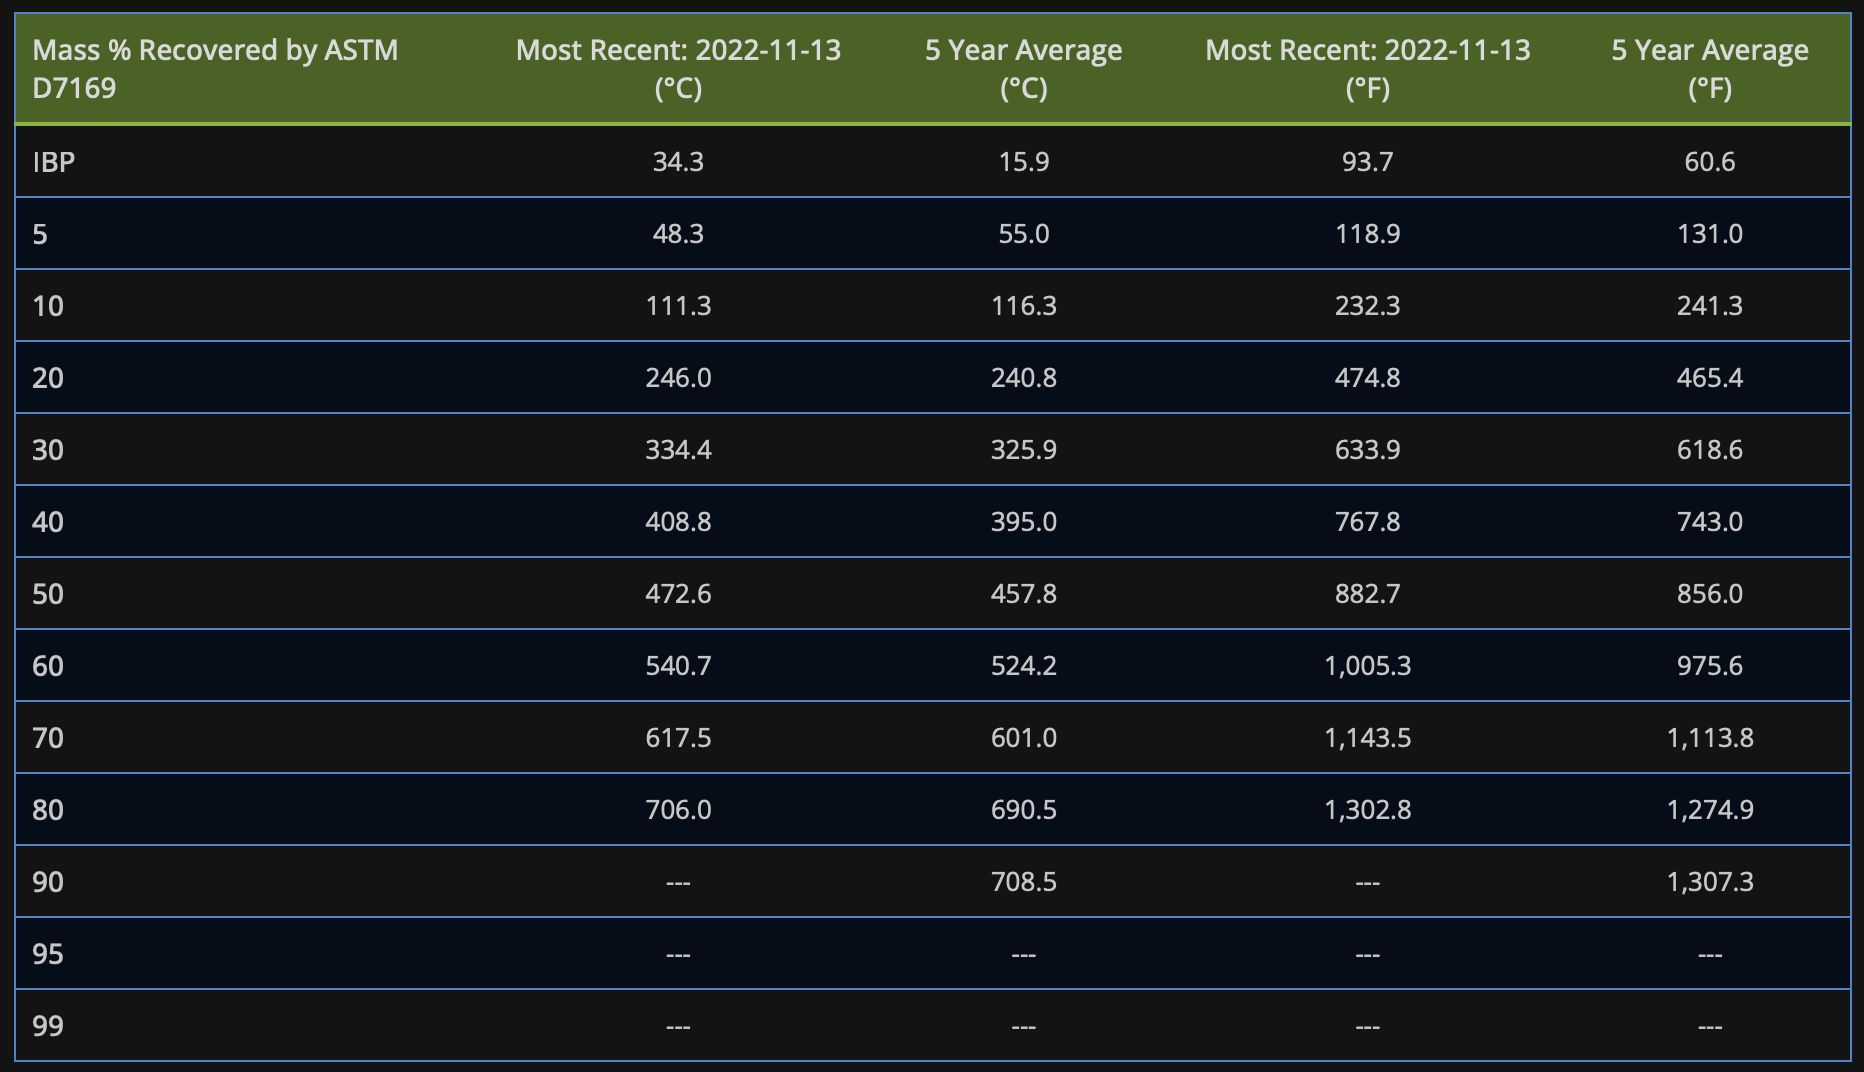

### 3. Modelling 

The model I chose is machine learning based regression model. The output will be multi-dimensional (12D) distillation profile, while the input will be all other properties for the crude oils. Below are the summaries of the two datasets.

In [2]:
from DataCleaner import CleanData

crude_data = CleanData()
x_data , Y_data = crude_data.get_x_y_data()

In [3]:
x_data.head()

property,Density(kg/m³),Gravity(°API),Sulphur(wt%),MicroCarbonResidue(wt%),Nickel(mg/kg),Vanadium(mg/kg),C3-(vol%),iC4iso-Butane(vol%),nC4n-Butane(vol%),iC5iso-Pentane(vol%),nC5n-Pentane(vol%),C6Hexanes(vol%),C7Heptanes(vol%),C8Octanes(vol%),C9Nonanes(vol%),C10Decanes(vol%),Benzene(vol%),Toluene(vol%),Ethylbenzene(vol%),Xylenes(vol%)
SurmontHeavyBlend(SHB),935.2,19.7,3.03,7.54,49.9,134.3,0.02,0.14,0.61,0.61,0.86,1.86,1.77,2.30,2.25,1.29,0.05,0.14,0.07,0.26
MixedSweetBlend(MSW),817.7,41.4,0.38,1.61,3.4,6.9,0.53,1.23,3.09,1.74,2.29,6.33,7.60,6.67,4.78,2.65,0.25,0.79,0.20,1.08
PeacePipeSour(SPR),831.9,38.5,1.52,2.98,12.0,33.9,0.48,1.23,2.98,1.64,2.24,5.87,6.69,6.87,5.54,3.02,0.24,0.71,0.21,0.98
Peace(MPR),808.7,43.3,0.42,1.14,2.3,6.0,0.56,1.16,2.95,1.69,2.40,6.71,7.61,7.85,6.30,3.37,0.28,0.87,0.24,1.23
LightSmiley(MSY),838.1,37.2,0.26,2.38,3.9,4.4,0.29,1.94,3.73,1.21,1.41,4.18,5.33,5.42,4.70,2.23,0.03,0.13,0.12,0.41


In [4]:
Y_data.head()

percentage,5,10,20,30,40,50,60,70,80,90,95,99
SurmontHeavyBlend(SHB),127.5,188.5,258.8,309.4,355.5,405.0,462.0,545.6,651.1,701.7,NaN,NaN
MixedSweetBlend(MSW),39.2,79.2,122.4,171.8,229.2,285.9,342.9,405.8,478.7,587.0,656.2,679.4
PeacePipeSour(SPR),49.5,88.5,138.4,191.3,249.6,309.8,372.6,444.5,535.2,650.6,681.3,NaN
Peace(MPR),44.9,84.4,125.4,167.4,212.7,267.5,324.2,388.1,463.7,579.4,646.5,694.7
LightSmiley(MSY),55.3,100.2,161.3,221.6,277.2,329.7,387.2,446.7,522.6,631.8,693.6,NaN


I decided to use a regression model in this case. So I built a pipeline using `scikit-learn`. Since the dataset is rather small, I did not want to focus too much on the model selection and reasoning aspect here. Rather, I used the pipeline to try a number regression models and hyperparameters and picked the one with highest `R2 score` as the one to make predictions. The details can be looked at in the `CrudeBlendModel.py` file, Below is a summary.

In [ ]:
# build a model switcher to try different regression models in using the pipeline
class modelSwitcher(BaseEstimator):
    
    def __init__(self, estimator=Lasso()):
        """
        A Custom BaseEstimator that can switch between regression models.

        Parameters:
        ----------
        estimator: sklearn object - The regression model. Can take values in 
        [Lasso(), RandomForestRegressor(), KNeighborsRegressor(), LinearRegression()]
        """ 

        self.estimator = estimator
    
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [ ]:
# Building pipeline 
estimators = [('scaler', StandardScaler()), ('reduce_dim', PCA()), ('model', modelSwitcher())]
pipe = Pipeline(estimators)

parameters = [{
        'model__estimator': [Lasso()], 
        'reduce_dim__n_components': [2,5,10,20],
        'model__estimator__alpha': [1.0, 5.0, 10.0, 20.0],
        'model__estimator__fit_intercept': [True, False]
    }, 
    {
        'model__estimator': [RandomForestRegressor()],
        'reduce_dim__n_components': [2,5,10,20],
        'model__estimator__n_estimators': [5, 20, 50, 100, 200],
        'model__estimator__max_depth': [3, 5, 10, 20, None],
        'model__estimator__max_features' : ["auto", "sqrt", "log2"]
    },
    {
        'model__estimator': [KNeighborsRegressor()],
        'reduce_dim__n_components': [2,5,10,20],
        'model__estimator__n_neighbors': [2, 5, 8, 10, 20],
        'model__estimator__weights': ['uniform', 'distance']
    },
    {
        'model__estimator': [LinearRegression()],
        'reduce_dim__n_components': [2,5,10,20],
        'model__estimator__fit_intercept': [True, False]
    }
]

Model = GridSearchCV(pipe, param_grid=parameters, cv=5, n_jobs=12)

Here, I built a pipeline to try four different regression model (Lasso, random forest, KNN, linear regression) and a number of hyperparameters to figure out the best model. The pipeline consists of scaling, dimension reduction, and training. I added `PCA` here to avoid overfitting, but I also allowed the number of principal components to go up to 20 to avoid underfitting. I believe have the step of dimensionality reduction is very necessary since many features are highly related to each other. The hyperparameters will be chosen using 5-fold cross validation. 

Like mentioned, all properties will simply take average based on their volume after mixing. 

### 4. Model Deployment and UI

I deployed the model using Flask. The details can be viewed in `main.py`. To see the final product, simply run `python main.py` in the terminal or using the `flask run` command. In short, you may choose any two crude oils from CrudeMonitor, and specify their volume to be mixed. The predicted distillation profile will be returned. 

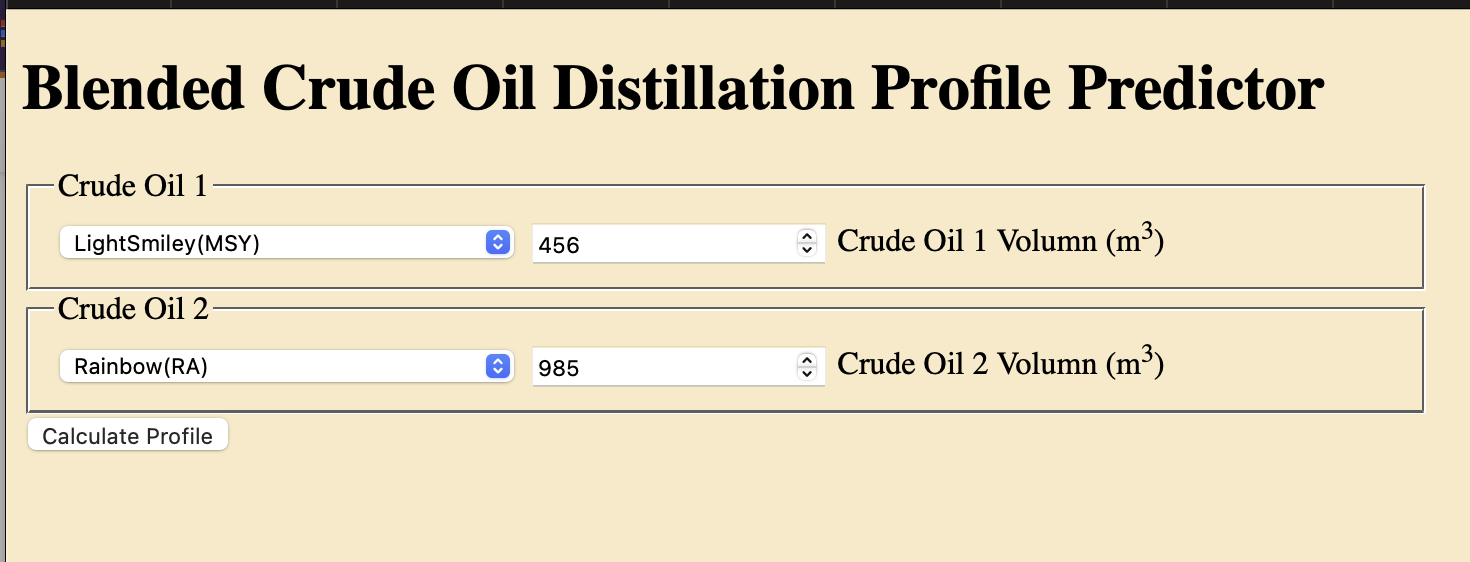

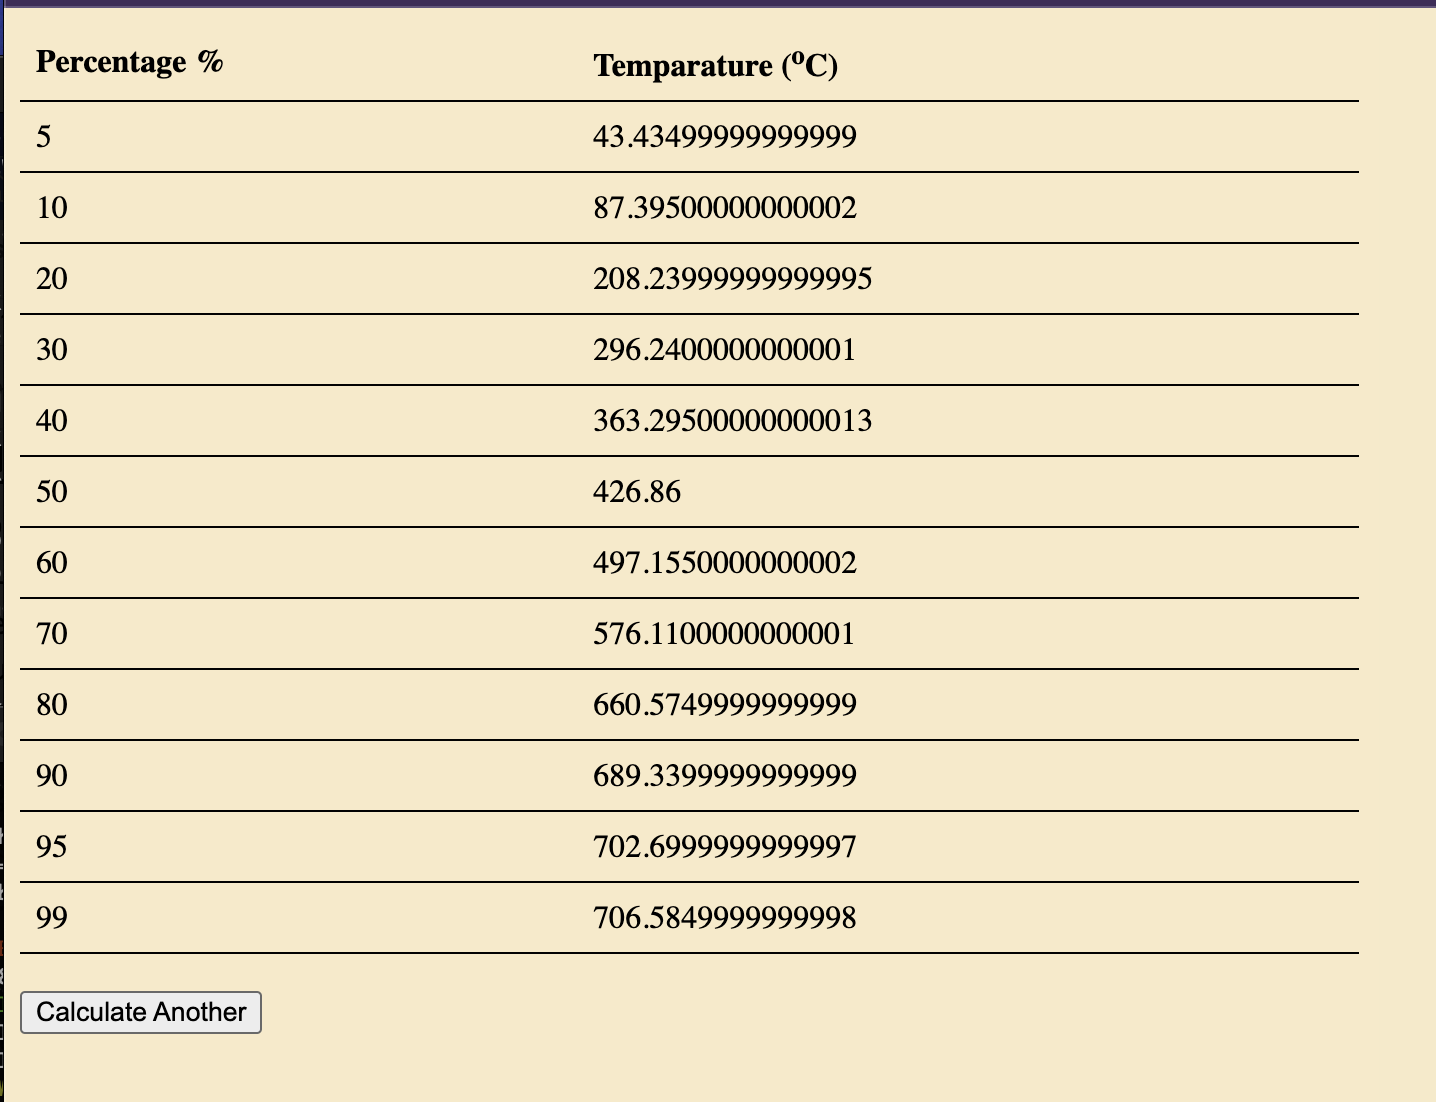

### 5. Further comments 

The whole process of web crawling, data cleaning, modelling, tuning, and UI launching can all be automated by running `main.py`. More work needs to be done to incorperate testing into the automated process. Further, I solely relied on data from CrudeMonitor in this case, thus more data sources can be used if identified. It is hard for me to find any good data about crude oil distillation profiles outside of CrudeMonitor, so some simple experiments can be conducted to collect more data. Due to the relative lack of data, the predicted results might be off in some cases. 

To put a dollar value to the error of my prediction, we can look at the predicted temparature and check how oil has evaporated, and comapre that to the actually percentage of oil evaporated at that temparature. The difference in the percentages times the input volumes, times crude oil price at the given time, will be the lost dollar revenue from the error. 

Also tests need to be added to confirm the completeness of the program. I skipped this step due to time constraints, but it is highly recommended to include some simple tests before deployment. 